In [1]:
import numpy as np
import random 
import pandas as pd
import os
import time
import csv 
import warnings

# MATH and STATS:
import math

# PLOT:
import matplotlib.pyplot as plt
from plotnine import *
from plotnine.data import *
%matplotlib inline

# SKLEARN:
from sklearn import metrics # AMII and ARI
from sklearn import decomposition #PCA
from sklearn import discriminant_analysis

# EMBEDDINGs:
import umap

In [2]:
from import_subset_datasets import *

In [3]:
def plot_lda_contours(em, mapper, gg):
    AA, BB = np.meshgrid(np.linspace(em.A.min(), em.A.max(), 20),
                     np.linspace(em.B.min(), em.B.max(), 20))
    cnt = lda.predict_proba(mapper.inverse_transform(np.c_[AA.ravel(), BB.ravel()]))
    fig = gg.draw()
    ax = fig.get_axes()[0]
    ax.contour(AA, BB, cnt[:,0].reshape(AA.shape), [0.5])
    ax.contour(AA, BB, cnt[:,1].reshape(AA.shape), [0.5])
    ax.contour(AA, BB, cnt[:,2].reshape(AA.shape), [0.5])

In [4]:
np.random.seed(44)
random.seed(44)

read_mnist_train = pd.read_csv(r"data\mnist_train.csv")
read_mnist_test = pd.read_csv(r"data\mnist_test.csv")

In [5]:
mnist_labels_raw = read_mnist_train.iloc[:, 0]

mnist_data = read_mnist_train.iloc[:, 1:]

selected_digits = [3, 8, 6]
selected_digits_2 = [1,4]

mnist_pca, mnist_labels, mnist_raw, ve, pca = import_subset(mnist_data, mnist_labels_raw, selected_digits,30, 800)
mnist_pca_2, mnist_labels_2, mnist_raw_2, ve2, pca2 = import_subset(mnist_data, mnist_labels_raw, selected_digits_2, 30, 800)

In [ ]:
# Transform test data
mnist_test_labels_raw = read_mnist_test.iloc[:, 0]
mnist_test_data = read_mnist_test.iloc[:, 1]
mnist_test_pca, mnist_test_labels, mnist_test_raw,_,_2 = import_subset(mnist_test_data, mnist_test_labels_raw, selected_digits, 30, 50, pca=pca)

In [6]:
mapper = umap.UMAP(metric='euclidean')
embedding = mapper.fit_transform(mnist_pca)

label = pd.Series(mnist_labels)
em = pd.DataFrame(embedding, columns=['A','B']) 
em['label'] = label.astype(str)
gg = ggplot(aes(x='A', y='B', color='label'), data=em)+geom_point()+ scale_color_discrete(guide=False)+ labs(x = "", y = "") 
#gg.save("MNIST38_real.png",dpi =300)

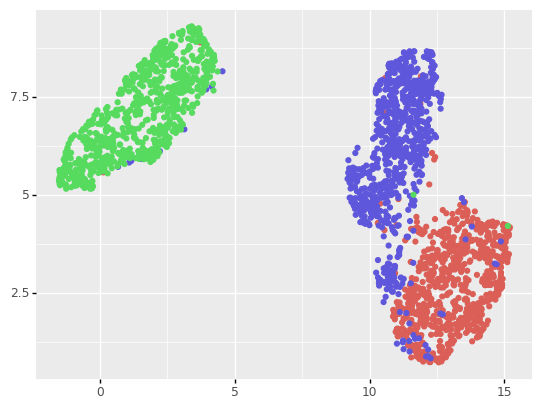

<ggplot: (132676268093)>

In [7]:
gg

In [8]:
nreps = 10

lda = discriminant_analysis.LinearDiscriminantAnalysis()
lda.fit(mnist_pca, label)

LinearDiscriminantAnalysis()

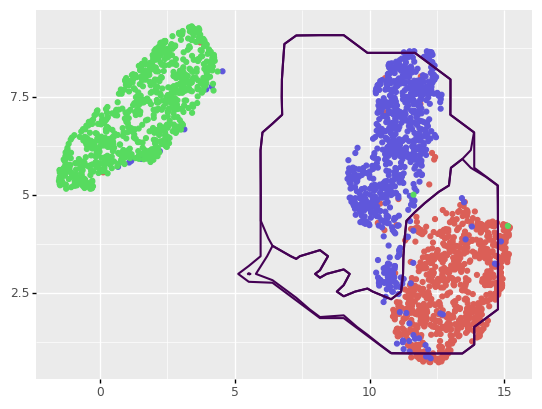

In [11]:
plot_lda_contours(em, mapper, gg)

In [12]:
mnist_pca.shape

(2400, 30)